In [1]:
%matplotlib inline
import random
import torch
from torch.distributions import multinomial


## Basic concept of a discrete random variable.

**Discrete Random Variable:**
In probability theory, a random variable is a variable that can take on different values based on the outcome of a random event. A discrete random variable is one that can only take on distinct, separate values, typically integers. For example, when rolling a six-sided die, the number rolled is a discrete random variable because it can only take values from 1 to 6.

**Probability Mass Function (PMF):**
For a discrete random variable, the probability mass function (PMF) gives the probability of each possible value that the random variable can take. The PMF provides a probability distribution for the discrete random variable, showing how likely each outcome is. PMF is represented by tensor (array). 


In [2]:
# Here PMF for fair dice
fair_probs = torch.ones(6) / 6
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

**Binomial Distribution:**

The binomial distribution is a discrete probability distribution that models the number of successes in a fixed number of independent Bernoulli trials. A Bernoulli trial is a random experiment with two possible outcomes, often referred to as "success" and "failure." The binomial distribution is characterized by two parameters:

1. **n**: The number of trials.
2. **p**: The probability of success in each trial.

The probability mass function (PMF) of the binomial distribution gives the probability of getting exactly $k$ successes in $n$ trials, and it is given by the formula:

$P(X = k) = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n - k} $

Where $\binom{n}{k}$ represents the binmial coefficient, which is the number of ways to choose $k$ successes out of $n$ trials. 
The formula to calculate the binomial coefficient is:

$\binom{n}{k} = \frac{n!}{k!\cdot (n-k)!}$  



**Example 1: Coin Flips**
Suppose you have a fair coin (p = 0.5) and you flip it 5 times (n = 5). What is the probability of getting exactly 3 heads?

In [3]:
from math import factorial

p = 0.5
n = 5
k = 3
binom = factorial(n) / (factorial(k) * factorial(n - k))
p = binom * pow(p, k) * pow(1-p, n-k)
binom, p


(10.0, 0.3125)

In Python, there are several tools and libraries that you can use to work with the binomial distribution:

In [4]:
n = 10
multinomial.Multinomial(n, fair_probs).sample() / n


tensor([0.0000, 0.2000, 0.1000, 0.2000, 0.1000, 0.4000])

In [5]:
n = 10000
h = [random.random() > 0.5 for _ in range(n)]
n_heads = sum(h)
n_tails = n - n_heads
n, n_heads, n_tails


(10000, 5045, 4955)

In [6]:
fair_probs = torch.tensor([0.5, 0.5])
n_tosses = 100000
from torch.distributions.multinomial import Multinomial

Multinomial(n_tosses, fair_probs).sample() / n_tosses


tensor([0.4988, 0.5012])

In [7]:
fair_probs = torch.tensor([0.5, 0.5])
counts = Multinomial(1000, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

cum_counts.shape

torch.Size([500, 2])

In [8]:
estimates.shape

torch.Size([500, 2])

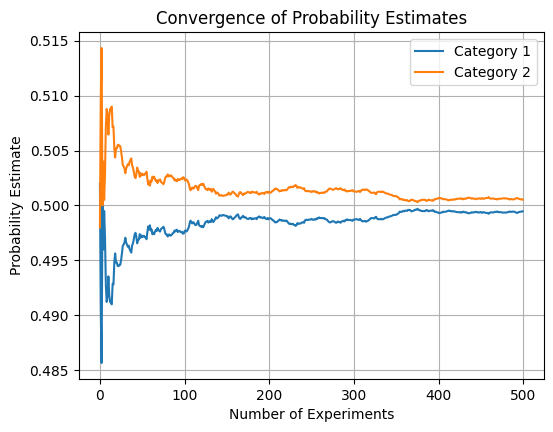

In [9]:
import matplotlib.pyplot as plt

n_experiments, n_categories = estimates.shape

plt.figure(figsize=(6, 4.5))

for i in range(n_categories):
    plt.plot(range(n_experiments), estimates[:, i], label=f'Category {i + 1}')

plt.xlabel('Number of Experiments')
plt.ylabel('Probability Estimate')
plt.title('Convergence of Probability Estimates')
plt.legend()
plt.grid(True)
plt.show()



In [10]:
range(n_experiments)


range(0, 500)